# Tutorial 7 - Pearson Correlation, Linear Regression.

_Peter Mahoney, Andrej Panjkov_

This is a test of running R using a Jupyter notebook, instead of in RStudio.  (Result: I prefer RStudio, for the great data views, the help page, and the more thorough tab-completion.  Also Rmarkdown files are easily edited in text editors, while ipynb files are awful internally. )

To get here: (Windows)
Install jypyter via anaconda, add r-essentials.

(Until I work out a better flow...)
Under windows, start a cmd shell.  (Why no app icons?) 
Cd to the working directory. Start jupyter notebook from the command line.

In the browser view of jupyter, create a new R notebook using the menu.

Linux: installation was a bit tricky, look for missing libraries (eg libcurl-openssl-dev). Uninstall ipython and ipython 3. Google for solutions.  Once installed, use jupyter notebook --notebook-dir <directory>.


## Part 1: Looking for relationships

__Open the Excel workbook called Tutorial 7 Data (on the LEO site).  In the first Tab, labelled Exam Results, are the mean number of hours per week studies by statistics students in the month before their final exam and their final exam marks. You are curious to see whether there is a relationship between means hours of study and exam results in these students.__

In [1]:
exam.results = read.csv("Tutorial 7 Data-Exam Results.csv", header=TRUE,row.names=1)
exam.results
attach(exam.results)

Final.Exam.Mark Mean.Study.Hours.Week
1             61.6                     6
2             67.9                     8
3             71.2                    11
4             74.2                    13
5             60.1                     5
6             60.6                     5
7             80.6                    15
8             82.0                    18
9             51.4                     4
10            55.0                     2
11            65.6                     6
12            66.2                     7
13            68.3                    10
14            69.5                    10
15            71.0                    11
16            73.7                    12
17            82.0                    14
18            81.4                    16
19            61.4                     6
20            67.2                     8
21            68.7                    10
22            68.5                    12
23            74.8                    13
24            84.8                    17
25            90.5                    18
26            55.0                     5
27            62.0                     6
28            66.7                     7
29            68.1                    10
30            72.2                    12

__a)	What type of statistical test will you use to test this null hypothesis? __

Pearson Correlation

__b)	 What will your null hypothesis (H0) be for this analysis? __

H0: There is no linear relationship between exam results and hours studied. (r=0)

__c)	What will your alternate hypothesis (H1) be for this analysis? __

H1: There is a linear relationship between exam results and hours studied. (r<>0)

__d)	What are the degrees of freedom for your test? __

In [2]:
dof = length(Final.Exam.Mark) - 2
dof

[1] 28

__e)	What are the assumptions of your chosen test? __

1.Linear relationship between variables

2.No significant outliers present

3.Both sets of data normally distributed

4.Data sets have equal variances

__f)	Do the data satisfy these assumptions? (Give your evidence here.)__

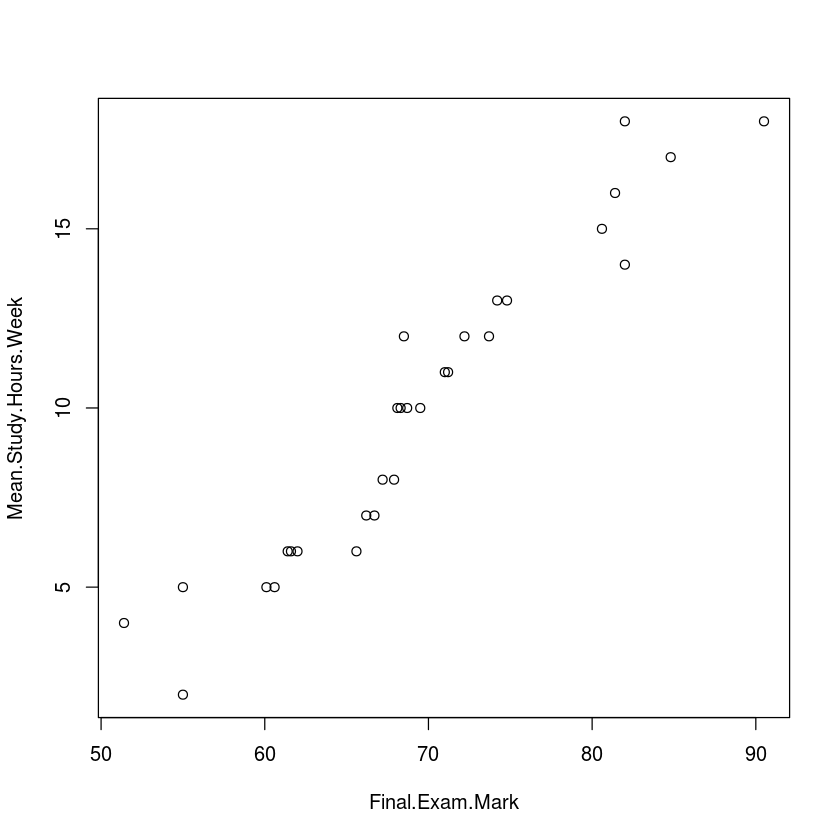

In [3]:
plot(exam.results)

The scatterplot is suggestive of a linear relationship.  No outliers are apparent.  (We could check by computing z scores.)

We also observe (visually) no strong evidence for heteroscedasticity.

Now we check normality in both data groups, using qqplots and Shapiro-Wilk test.  The q-q plots and the high p-values from the SW test show the data is from a normal population.

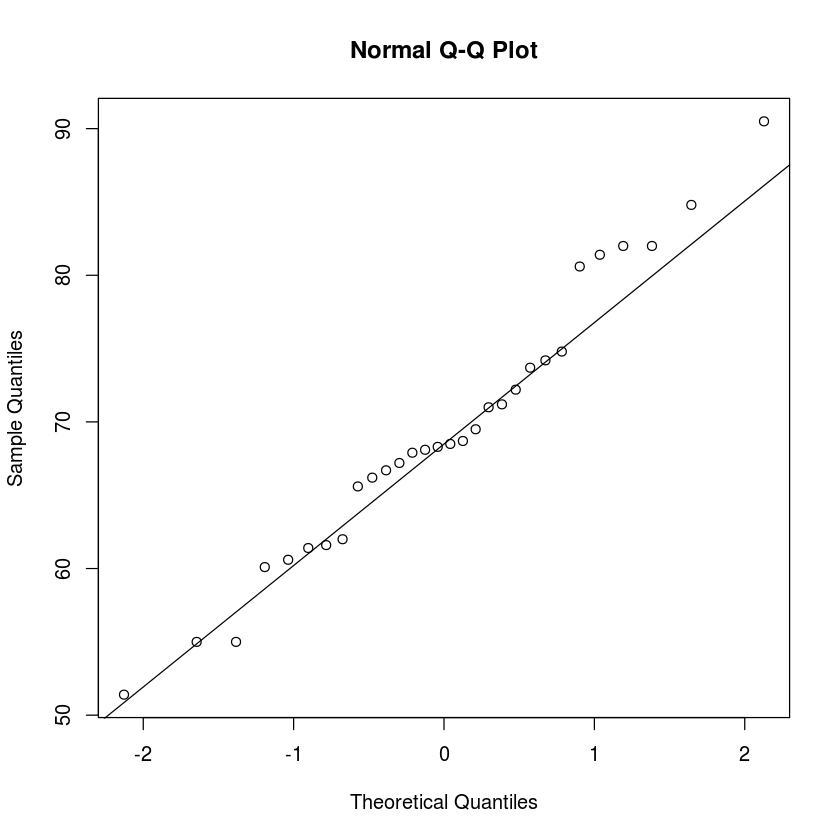


	Shapiro-Wilk normality test

data:  Final.Exam.Mark
W = 0.97558, p-value = 0.6998



	Shapiro-Wilk normality test

data:  Mean.Study.Hours.Week
W = 0.96164, p-value = 0.3408


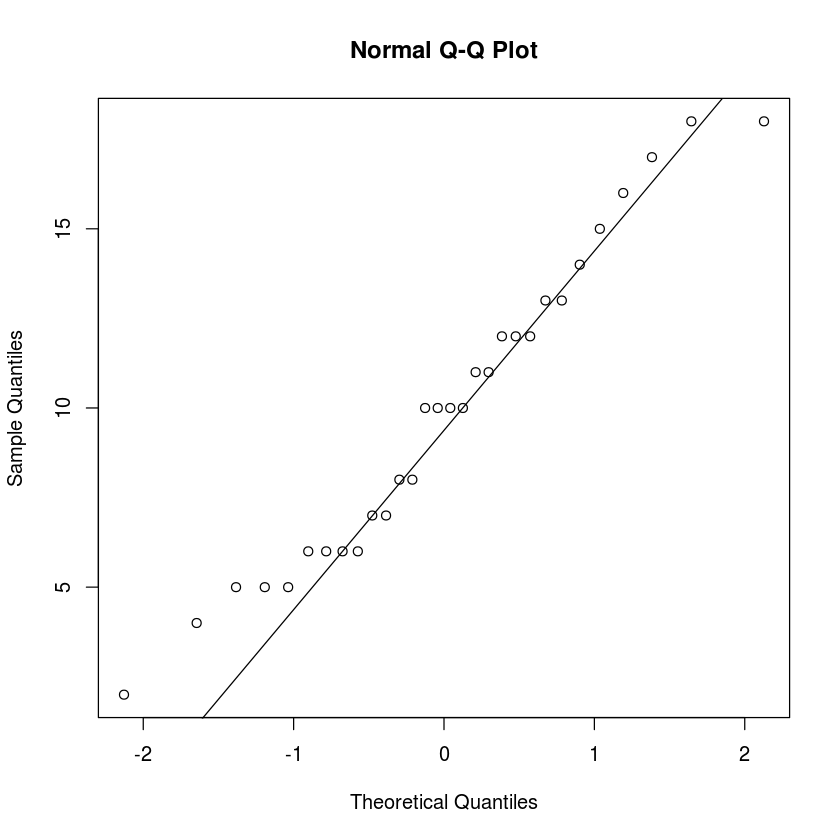

In [4]:
qqnorm(Final.Exam.Mark)
qqline(Final.Exam.Mark)
qqnorm(Mean.Study.Hours.Week)
qqline(Mean.Study.Hours.Week)
shapiro.test(Final.Exam.Mark)
shapiro.test(Mean.Study.Hours.Week)

__g)	Is the relationship between these two variables positive or negative? __

The relationship is positive, from the scatterplot.

__h)	How strong is the relationship between the two variables? __

In [5]:
result = cor.test(Final.Exam.Mark, Mean.Study.Hours.Week)
result
result$estimate


	Pearson's product-moment correlation

data:  Final.Exam.Mark and Mean.Study.Hours.Week
t = 18, df = 28, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9156112 0.9807007
sample estimates:
      cor 
0.9594048 


cor 
0.9594048

We see that the Pearson correlation coefficient is 0.959, a very strong relationship.

__i)	At α = 0.05, what is the critical value of the test statistic for this test (from the critical values table_ below)? _

From the table, the critical value is 0.361.

We can also get the value from R.  We need the addin package SuppDists.  We only need to install it here once, once that's done, the install.packages command can be commented out. 

Note that qPearson takes the parameter N, not df.



In [6]:
# install.packages("SuppDists", repos = "http://cran.ms.unimelb.edu.au/")
require(SuppDists)
library(SuppDists) 
qPearson(p=0.975,N=30)

Loading required package: SuppDists


[1] 0.3608493

__j)	Do you accept or reject your null hypothesis?_ _

The tiny p-value and the confidence interval returned from cor.test both lead us to reject the null hypotheses. (As does rho_calc = 0.959 > rho_crit = 0.361.

__k)	What does this mean for your alternate hypothesis?__

We accept the alternative.

__l)	What proportion of the variation in exam marks is accounted for by the variation in hours studied? __


In [7]:
mode(result$estimate)
names(result$estimate)
rho <- as.numeric(result$estimate["cor"])
rho
rho^2

[1] "numeric"

[1] "cor"

[1] 0.9594048

[1] 0.9204577

So 92% of variation in exam marks is due to hours studied.

__m)	What proportion of the variation in hours studied is accounted for by the variation in exam marks? __

Again, 92%.

__n)	What proportion of the variation in exam marks is accounted for by factors other than the variation in hours studied? __

In [8]:
1-rho^2

[1] 0.07954233

__o)	If you were to visualise the data as a scatterplot, which variable would be on the x-axis? __

I lean towards Mean Study Hours for the independent variable, but either is ok, there may not be causation. 

In [9]:
detach(exam.results)

## Part 2: Still looking for relationships

__Based on the data used in the correlation test above, a researcher says that he has calculated an equation by which students' final exam marks can be estimated based on the mean number of hours each student studies. He claims that the equation is...
Final exam mark = 49.254 + (2.0356 x mean study hours per week)__

__a)	Should you accept the researchers claims for this equation? Why or why not? __

Peter says:
You should not accept this claim. Correlation testing, as performed in part 1 can only show the strength of a relationship, not produce predictive equations. To produce such an equation requires linear regression which has different assumptions, including that the values of x were chosen deliberately rather than being randomly gathered. The data used above violate this assumption. Additionally, regression, as used in part 1, makes no claims about causality where the researchers equation clearly assumes that final marks are dependent on study hours and the data used in the regression were not collected to demonstrate that.

__b)	Design an experiment that will provide data useful for generating an equation that can be trusted. __

We would select students at random, and assign them a target number of study hours - to control the x-variable.  Then we monitor the response- exam results.  We want a manipulative experiment, as opposed the mensurative experiment of Part 1.

__In the Excel workbook called Tutorial 7 Data (on the LEO site), the second  Tab, labelled Exam Experiment, are the mean number of hours per week studies by statistics students in the month before their final exam and their final exam marks. This data was collected as part of an experiment where the mean hours of study were deliberately chosen and students randomly assigned to groups. Use this data for the following questions. __

In [10]:
exam.expt = read.csv("Tutorial 7 Data-Exam Experiment.csv", header=TRUE,row.names="Student.Identifier")
attach(exam.expt)
exam.expt


Mean.Study.Hours.Week Final.Exam.Mark
1                      2            51.4
2                      2            55.0
3                      2            62.0
4                      2            60.1
5                      2            60.6
6                      6            61.4
7                      6            61.6
8                      6            55.5
9                      6            65.6
10                     6            67.0
11                    10            62.8
12                    10            67.2
13                    10            67.9
14                    10            68.5
15                    10            72.8
16                    14            66.0
17                    14            67.1
18                    14            69.5
19                    14            74.0
20                    14            77.0
21                    18            72.2
22                    18            73.7
23                    18            82.0
24                    18            74.8
25                    18            80.6
26                    20            78.0
27                    20            82.0
28                    20            74.2
29                    20            83.6
30                    20            83.1

__c)	What type of statistical test will you use to test the data from your newly designed experiment? __

Linear Regression.

__d)	What are the assumptions of your chosen test? __

1. Linear relationship between dependent variable (y) and independent variable (x)
2. Values of the independent variable (x) are NOT random but are selected by the observer
3. For any value of x, the associated values of y are normally distributed
4. Equal variances (homoscedasticity)

__ e)	Do the data satisfy these assumptions? (Give your evidence here)__

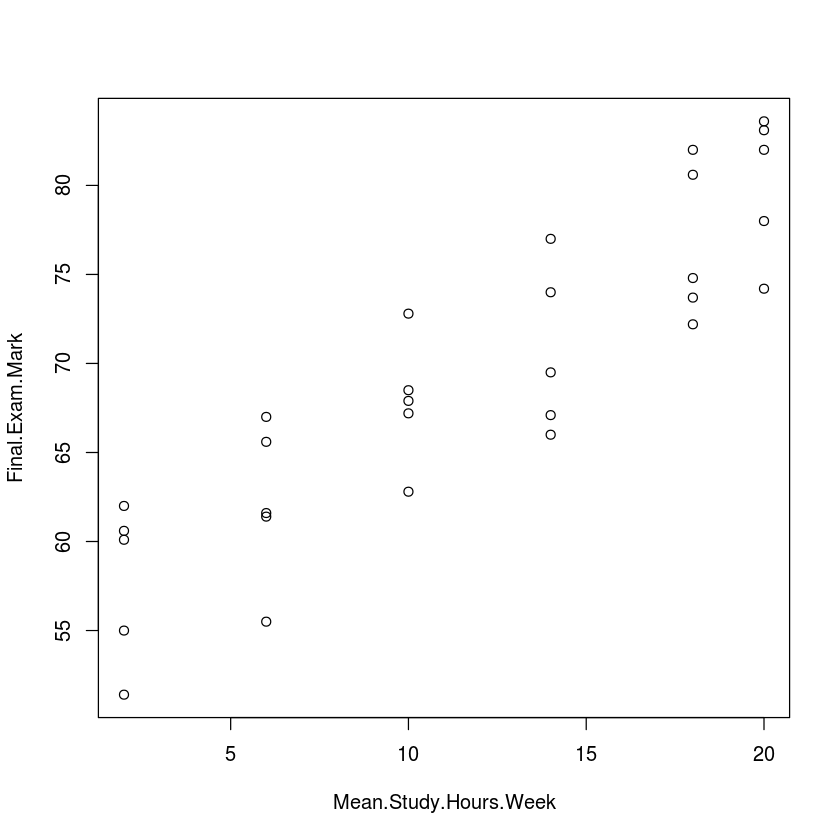

In [11]:
plot(exam.expt)

We see:
 * A linear trend
 * Similar variances for each x
 
So assumptions 1 and 4 are met.  Let's actually exhibit the variances for each treatment group:

In [12]:
examvars <- by(exam.expt,  #source data frame (see below for more 'by')
   exam.expt$Mean.Study.Hours.Week, #factor column to split by
   function(df) var(df$Final.Exam.Mark)) # Function to be applied to each factor group
examvars

exam.expt$Mean.Study.Hours.Week: 2
[1] 19.892
------------------------------------------------------------ 
exam.expt$Mean.Study.Hours.Week: 6
[1] 20.122
------------------------------------------------------------ 
exam.expt$Mean.Study.Hours.Week: 10
[1] 12.713
------------------------------------------------------------ 
exam.expt$Mean.Study.Hours.Week: 14
[1] 21.767
------------------------------------------------------------ 
exam.expt$Mean.Study.Hours.Week: 18
[1] 19.038
------------------------------------------------------------ 
exam.expt$Mean.Study.Hours.Week: 20
[1] 16.012

The variances are close, except maybe for hours = 10.  Jumping ahead of the tutes, we can do an Fmax test (Hartley's) to test for equal variances. The largest and smallest are for hours 10 and 6. The groups are normally distributed, see below. (This suggests that checking normality should be checked before homoscedasticity.)

I could copy and paste the numbers. In a rerunnable script, one  capture the numbers into variables and compute fmax on those.  Copy and Paste won't change if the data changes.  

In [13]:
fmax <- max(examvars)/min(examvars) # should check for divbyzero
fmax

[1] 1.712184

Now we are winning!  Imagine doing this in Excel or SPSS.

The SuppDists package we loaded above contains the Fmax distribution.

In [14]:
qmaxFratio(p=0.95,
           df=4, #5 e.u.s per treatment factor (hours)
           k=6, #number of factors
          )

[1] 29.54387

If p=0.975, (i.e.alpha=0.05) splitting the probability across tails, this is rather different to the critical Fmax ratio in the supplied tables: Fmaxcrit(df=4, k=6) = 29.5.  But I think this is a one-tailed test? We have ordered Fmax to be always greater than or equal to one. p=0.95 gives the same value as the lecture (and other) tables.

Either way, our Fmax is much less than Fmaxcrit, so we accept the NUll: the variances are the same. (I couldn't find a Hartley.test function, or Fmax.test, so we just compare the stat to the crit.val. manually.

This is a quantitative statement, and less subjective than gauging homoscedasticity by eye.

We should also note that R comes with Bartlett's test for homogeneity of variances among several groups - no need to split off largest and smallest variances:

In [15]:
bartlett.test(exam.expt$Final.Exam.Mark, exam.expt$Mean.Study.Hours.Week) #data, factors


	Bartlett test of homogeneity of variances

data:  exam.expt$Final.Exam.Mark and exam.expt$Mean.Study.Hours.Week
Bartlett's K-squared = 0.33712, df = 5, p-value = 0.9969


High p-value: accept null, variances are homogeneous.

---

Returning to the remaining assumptions.

We have _chosen_ the Mean Study Hours, so assumption 2 is met.

It remains to check normality within each treatment group.  We will use the 'by' function to split by the treatment factors (Mean Hours Study), and perform a Shapiro-Wilk test on each factor group.  All the p-values are large, so each group is normal.  (Idea taken from the R Cookbook, a valuable collection of techniques for R.  Free on web, really. )
 

In [16]:
by(exam.expt,  #source data frame
   exam.expt$Mean.Study.Hours.Week, #factor column to split by
   function(df) shapiro.test(df$Final.Exam.Mark)) # Function to be applied to each factor group


exam.expt$Mean.Study.Hours.Week: 2

	Shapiro-Wilk normality test

data:  df$Final.Exam.Mark
W = 0.88611, p-value = 0.3379

------------------------------------------------------------ 
exam.expt$Mean.Study.Hours.Week: 6

	Shapiro-Wilk normality test

data:  df$Final.Exam.Mark
W = 0.93113, p-value = 0.6041

------------------------------------------------------------ 
exam.expt$Mean.Study.Hours.Week: 10

	Shapiro-Wilk normality test

data:  df$Final.Exam.Mark
W = 0.95264, p-value = 0.7561

------------------------------------------------------------ 
exam.expt$Mean.Study.Hours.Week: 14

	Shapiro-Wilk normality test

data:  df$Final.Exam.Mark
W = 0.92544, p-value = 0.5656

------------------------------------------------------------ 
exam.expt$Mean.Study.Hours.Week: 18

	Shapiro-Wilk normality test

data:  df$Final.Exam.Mark
W = 0.87842, p-value = 0.3022

------------------------------------------------------------ 
exam.expt$Mean.Study.Hours.Week: 20

	Shapiro-Wilk normality test

data:

 
__f)	 Using the data from new experiment data, calculate an equation (without using SPSS) for the regression line that could be used to predict final marks based on study hours? __

First, we'll just use R's lm (linear model) function. Note the odd notation.


Call:
lm(formula = Final.Exam.Mark ~ Mean.Study.Hours.Week)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8906 -3.0365  0.3245  3.5810  5.5745 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            55.1384     1.5337   35.95  < 2e-16 ***
Mean.Study.Hours.Week   1.2087     0.1154   10.47 3.42e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.025 on 28 degrees of freedom
Multiple R-squared:  0.7967,	Adjusted R-squared:  0.7894 
F-statistic: 109.7 on 1 and 28 DF,  p-value: 3.42e-11


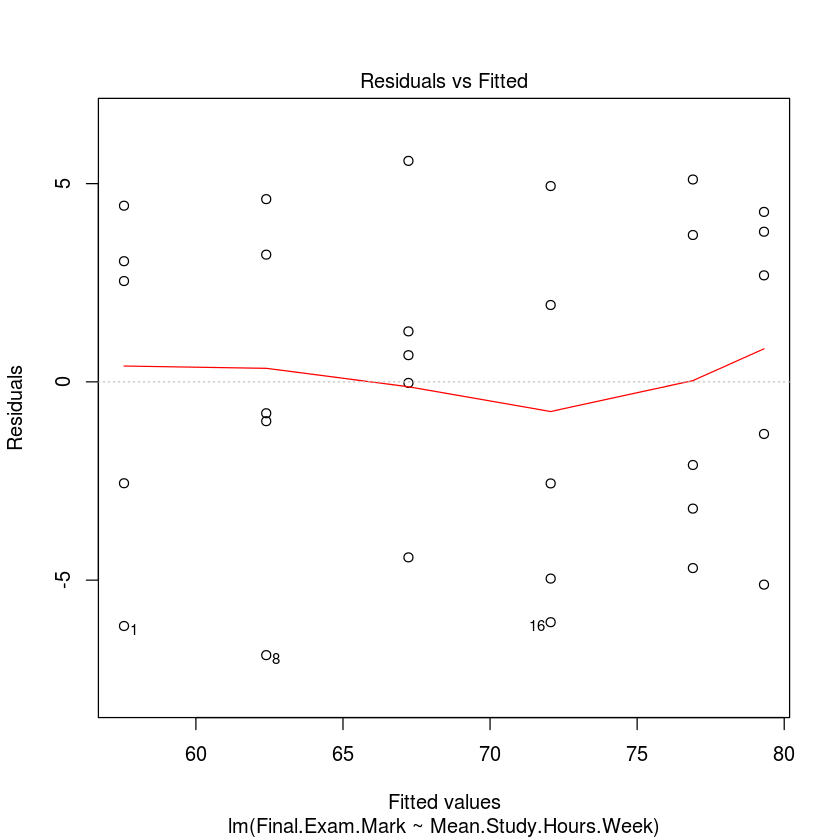

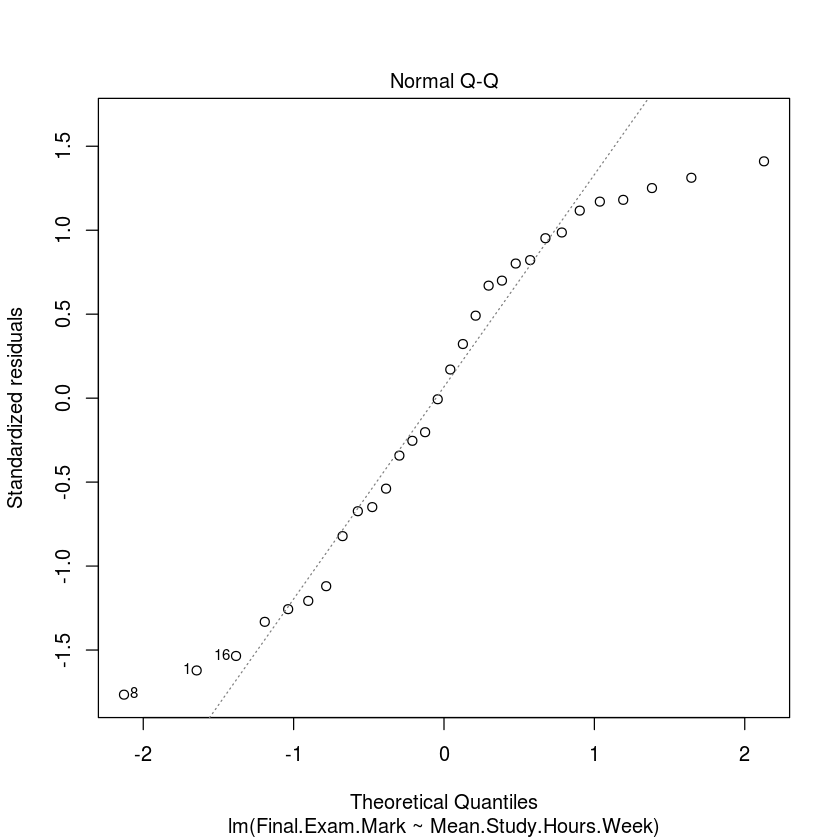

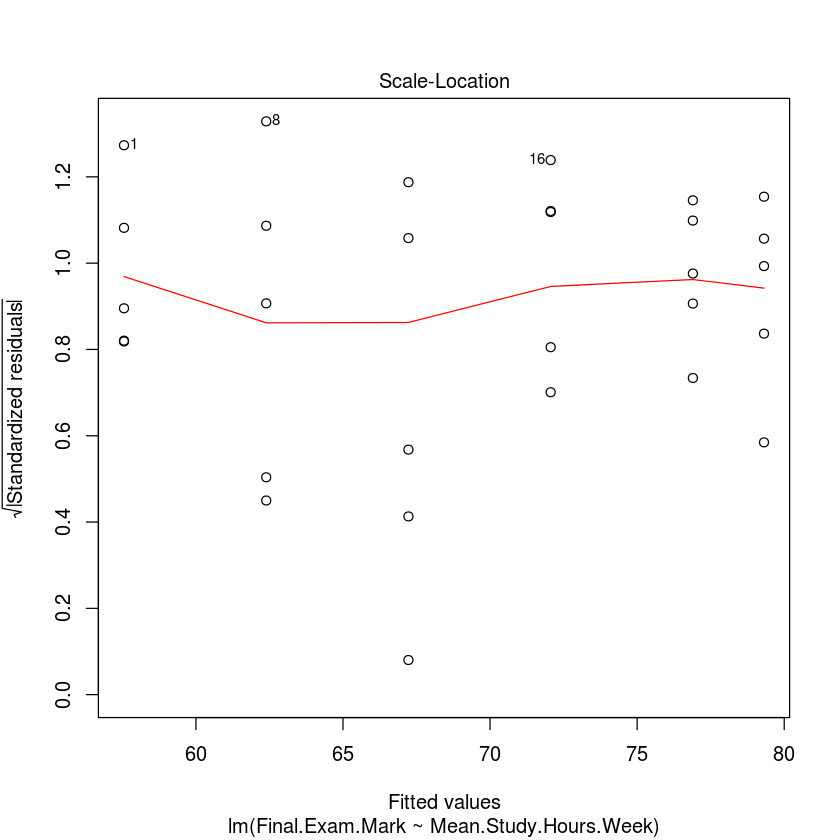

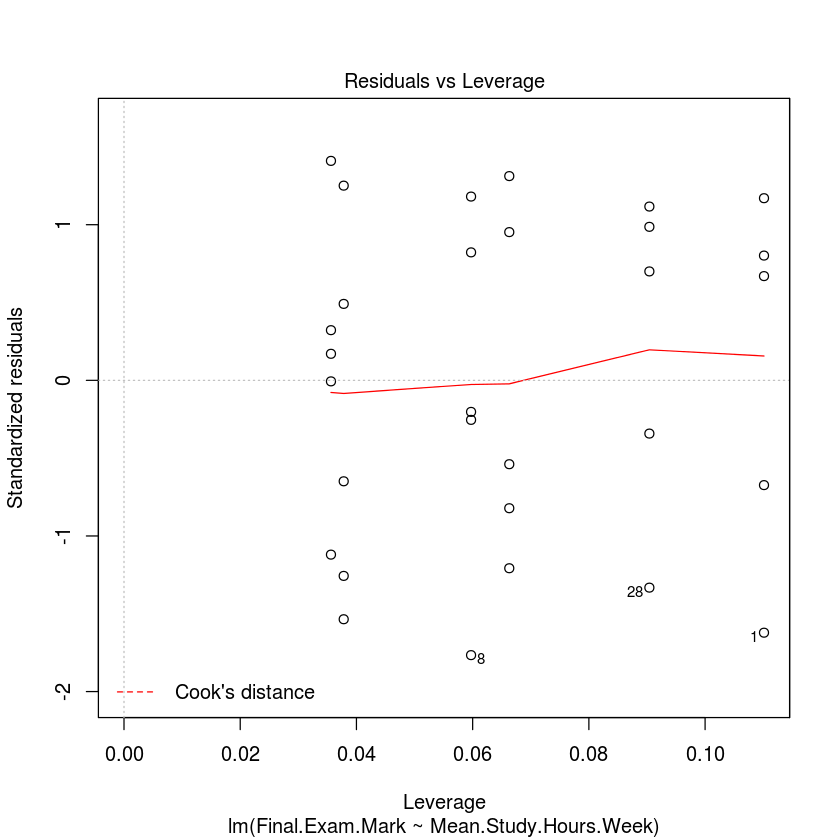

In [17]:
model <- lm(Final.Exam.Mark ~ Mean.Study.Hours.Week)
summary(model)
plot(model)

Now for programming practice, we'll compute the coefficients using the formulas from the lecture.

In [18]:
sumx <- sum(Mean.Study.Hours.Week)
sumx2 <- sum(Mean.Study.Hours.Week^2)
n <- length(Mean.Study.Hours.Week)
denom <- n*sumx2 - sumx^2

sumxy <- sum(Mean.Study.Hours.Week * Final.Exam.Mark)
sumy <- sum(Final.Exam.Mark)
numer <- n*sumxy - sumx*sumy

b.direct <- numer/denom

ymean <- mean(Final.Exam.Mark)
xmean <- mean(Mean.Study.Hours.Week)

a.direct <- ymean - b.direct*xmean

b.direct
a.direct

#agree with output of lm?
print("Difference between lm coeffs and mine:")
a.direct - model$coefficients["(Intercept)"]
b.direct - model$coefficients["Mean.Study.Hours.Week"]

[1] 1.208712

[1] 55.13836

[1] "Difference between lm coeffs and mine:"


(Intercept) 
-2.131628e-14

Mean.Study.Hours.Week 
         2.664535e-15

__g)	What final exam mark would you expect from  a statistics student who studied a mean of 7 hours per week?__



In [19]:
predict.at <- data.frame(Mean.Study.Hours.Week=7)
predict(model, predict.at, interval="prediction")  #(95%)

fit      lwr      upr
1 63.59934 55.14629 72.05239

Hmmm. One might ask - what is the minimum amount of study to be 95% confident of getting a mark of 80?  

We could do a prediction table and find the Hours that has 80 as the lower end of the 95% "prediction interval":

In [20]:
hours <- c(7,8,9,10,11,12,13,14,15,16,17,18,19,20)

predict.at <- data.frame(Mean.Study.Hours.Week<-hours)
predictions <- predict(model, predict.at, interval="prediction")
predictions
hours

fit      lwr      upr
1  63.59934 55.14629 72.05239
2  64.80805 56.38259 73.23352
3  66.01677 57.61232 74.42121
4  67.22548 58.83545 75.61551
5  68.43419 60.05193 76.81645
6  69.64290 61.26176 78.02405
7  70.85162 62.46492 79.23832
8  72.06033 63.66143 80.45923
9  73.26904 64.85131 81.68677
10 74.47775 66.03462 82.92089
11 75.68647 67.21141 84.16152
12 76.89518 68.38176 85.40860
13 78.10389 69.54575 86.66203
14 79.31260 70.70348 87.92173

[1]  7  8  9 10 11 12 13 14 15 16 17 18 19 20

R is a little awkward here  - it hasn't printed the x value in each row. To fix:


In [21]:
cbind (hours, predictions)

hours      fit      lwr      upr
1      7 63.59934 55.14629 72.05239
2      8 64.80805 56.38259 73.23352
3      9 66.01677 57.61232 74.42121
4     10 67.22548 58.83545 75.61551
5     11 68.43419 60.05193 76.81645
6     12 69.64290 61.26176 78.02405
7     13 70.85162 62.46492 79.23832
8     14 72.06033 63.66143 80.45923
9     15 73.26904 64.85131 81.68677
10    16 74.47775 66.03462 82.92089
11    17 75.68647 67.21141 84.16152
12    18 76.89518 68.38176 85.40860
13    19 78.10389 69.54575 86.66203
14    20 79.31260 70.70348 87.92173

So we haven't supplied a value for the number of hours that has yet put the prediction interval completely past 80. (20 hours gives 70-87).  But our model is not trustworthy for Hours > 20.   



__h)	From your calculated equation, if you increased the mean study hours per week of a student from 8 to 9, what change would you expect in their final exam mark? __

In [22]:
model$coefficients["Mean.Study.Hours.Week"]


Mean.Study.Hours.Week 
             1.208712

Also, see our prediction table, which makes predictions for 8 and 9 hours.

__i)	What final exam mark would you expect from  a statistics student who studied a mean of 1 hour per week? __

We should not use the model to estimate the mark associated with 1 hour - that is outside the range of the control data that was used to generate the model.

__j)	What proportion of the variation in exam marks is accounted for by the variation in hours studied? __

In [23]:
rs <- summary(model)$r.squared
ars <- summary(model)$adj.r.squared
rs
ars


[1] 0.7967024

[1] 0.7894418

__k)	What proportion of the variation in exam marks is accounted for by factors other than the variation in hours studied? __

In [24]:
1-ars

[1] 0.2105582

Done.  It all worked ok, but I think I like RStudio better, for R.  I needed a console for testing snippets, and I needed to refer to help pages - so I had RStudio open anyway!

This is saved as a Jupyter notebook (.ipynb), but one can export to html using the file menu.